# Matrix movie color conversion

Based on a twitter post:

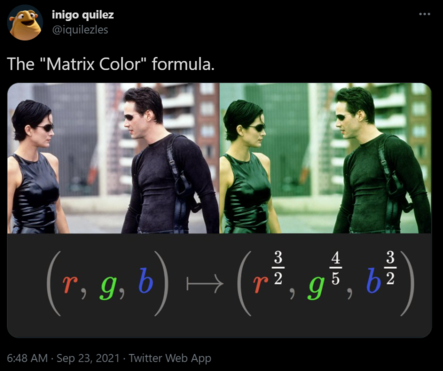

In [216]:
from PIL import Image
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

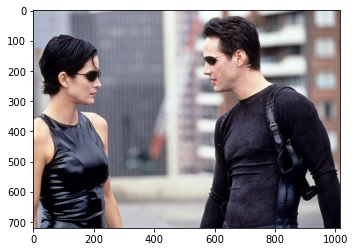

In [217]:
img = Image.open("matrix.jfif")
plt.imshow(img)

In [218]:
data = np.asarray(img)

In [219]:
s = data.shape
print(s)

(720, 1015, 3)


In [220]:
data.shape = (s[0]*s[1], 3)
print(data.shape)

(730800, 3)


Here's a simple implementation.

2.1613899000003585


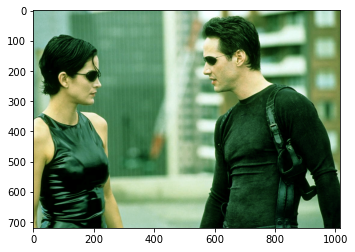

In [221]:
# simple implementation 
start = timer()
# scale image to [0, 1]
ndata = data / 255.0
# slowest part
ndata = np.array([ [c[0]**1.5, c[1]**0.8, c[2]**1.5] for c  in ndata])
# scale image to [0, 255]
ndata = np.array(255 * ndata, dtype=np.uint8)
end = timer()
ndata.shape = s
print(end - start)

nimg = Image.fromarray(ndata)
plt.imshow(nimg)

Now let's try to make it run faster.

0.050817300001654075


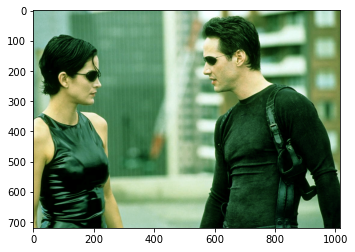

In [222]:
# vectorized - much faster!
start = timer()
ndata = np.array(data, dtype=np.float32)
ndata[:, 0]= (ndata[:, 0]/255.0)**1.5
ndata[:, 1]= (ndata[:, 1]/255.0)**0.8
ndata[:, 2]= (ndata[:, 2]/255.0)**1.5
# scale image to [0, 255]
ndata = np.array(255 * ndata, dtype=np.uint8)
end = timer()
ndata.shape = s
print(end - start)

nimg = Image.fromarray(ndata)
plt.imshow(nimg)

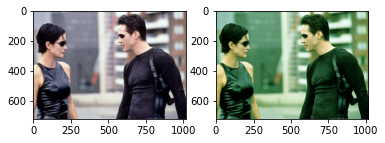

In [223]:
f, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(nimg)